In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [211]:
df=pd.read_excel('incomedata.xlsx')

In [212]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Bob,29,90000
2,Jim,29,61000
3,Shirm,28,60000
4,Kafir,42,150000
5,Neeta,39,155000
6,shyam,41,160000
7,Ram,38,162000
8,Ghanshaym,36,162000
9,Mohan,35,130000


# creat plot to see how data has been distributed and also will get idea of choosing random cluster

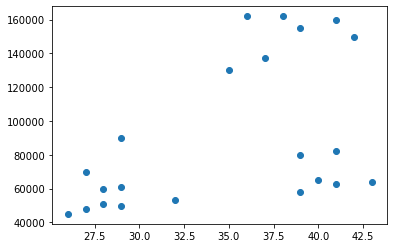

In [213]:
plt.scatter(df['Age'],df['Income($)'])

so it seems there could be three cluster so will choose K=3 here by randomly

In [214]:
km=KMeans(n_clusters=3)

In [215]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [216]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [217]:
df['cluster']=y_predicted # add predicted cluster value in dataset

In [218]:
df.head()


,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Bob,29,90000,2
2,Jim,29,61000,0
3,Shirm,28,60000,0
4,Kafir,42,150000,1


In [219]:
km.cluster_centers_ # get the center values of random cluster

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50857143e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [220]:
# creat separate cluster and plot them with their each center value

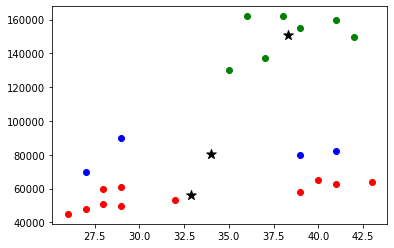

In [221]:
#after getting cluster will separate data on cluse wise since we have randomly choosen 3 cluster hence data will divide in 3
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

#ploting all cluster 

plt.scatter(df1['Age'],df1['Income($)'],c='red')
plt.scatter(df2['Age'],df2['Income($)'],c='green')
plt.scatter(df3['Age'],df3['Income($)'],c='blue')

#assign center value in each cluster

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',s=100,marker='*')

# now we can see center value represented by * in plot but seems not fited due to non-standard data
#non-standard data= Age have 2 digit but Income($) have 5 digits hence need to standarzie dataset



In [227]:
from sklearn.preprocessing import MinMaxScaler # to normalise data

In [228]:
scaler=MinMaxScaler()

In [229]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [230]:
df.head() # we can see data has been scaled normaly

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Bob,0.176471,0.384615,2
2,Jim,0.176471,0.136752,0
3,Shirm,0.117647,0.128205,0
4,Kafir,0.941176,0.897436,1


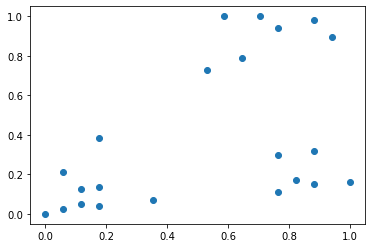

In [231]:
plt.scatter(df['Age'],df['Income($)']) # again plot the data

In [255]:
km=KMeans(n_clusters=3) # calling again Kmean 

In [235]:
y_predict=km.fit_predict(df[['Age','Income($)']])

In [236]:
df['cluster']=y_predict

In [237]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Bob,0.176471,0.384615,2
2,Jim,0.176471,0.136752,2
3,Shirm,0.117647,0.128205,2
4,Kafir,0.941176,0.897436,1


In [256]:
km.cluster_centers_ # getting center values

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

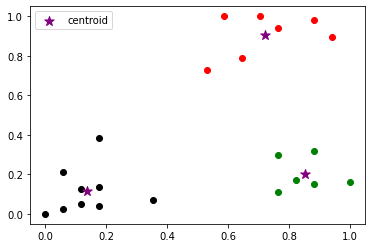

In [250]:
#after getting cluster will separate data on cluse wise since we have randomly choosen 3 cluster hence data will divide in 3
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

# again plot the clusters

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=100)
plt.legend()


# Eblow plot- Getting correct K value to choose

In [257]:
# choosing best k value based on sum of squres error
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

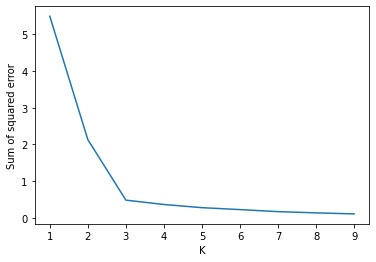

In [258]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# best k Value is 3